# Declination Ranges
| Start       | End         | Galaxies |
|-------------|-------------|----------|
| $-1.2^\circ$ | $1.104^\circ$ | $11798$      |
| $1.8^\circ$  | $2.62^\circ$  | $515$      |
| $46^\circ$   | $50^\circ$    | $386$      |
| $50^\circ$   | $51^\circ$    | $8163$      |
| $51^\circ$   | $52^\circ$    | $19837$      |
| $52^\circ$   | $54^\circ$    | $8346$      |
| $54^\circ$   | $56.5^\circ$  | $6680$      |
| $62^\circ$   | $62.4^\circ$  | $382$      |

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib auto

In [19]:
file = 'output_data.csv'
df = pd.read_csv(file)
scale=1
df.head()

,source_type,source_name,RA,DEC,z_hetdex,z_hetdex_conf,Zsin(RA),Zcos(RA),Zsin(DEC),Zcos(DEC)
0,lae,HETDEX J012809.05-010619.7,22.037708,-1.105466,2.162478,0.950000,0.811398,2.004481,-0.041720,2.162075
1,lae,HETDEX J012808.66-010619.2,22.036074,-1.105345,2.768879,0.950000,1.038857,2.566607,-0.053414,2.768364
2,lae,HETDEX J013608.63-010615.5,24.035955,-1.104304,2.319991,0.950000,0.944955,2.118824,-0.044712,2.319560
3,lae,HETDEX J020009.09-010603.7,30.037857,-1.101020,2.331798,0.266502,1.167233,2.018625,-0.044806,2.331367
4,lae,HETDEX J013605.08-010533.9,24.021162,-1.092748,1.997067,0.950000,0.812954,1.824112,-0.038086,1.996704


In [10]:
df['Zcos(RA)'], df['Zsin(RA)'] = df['Zcos(RA)']*scale, df['Zsin(RA)']*scale
df['Zcos(Dec)'], df['Zsin(Dec)'] = df['Zcos(DEC)']*scale, df['Zsin(DEC)']*scale

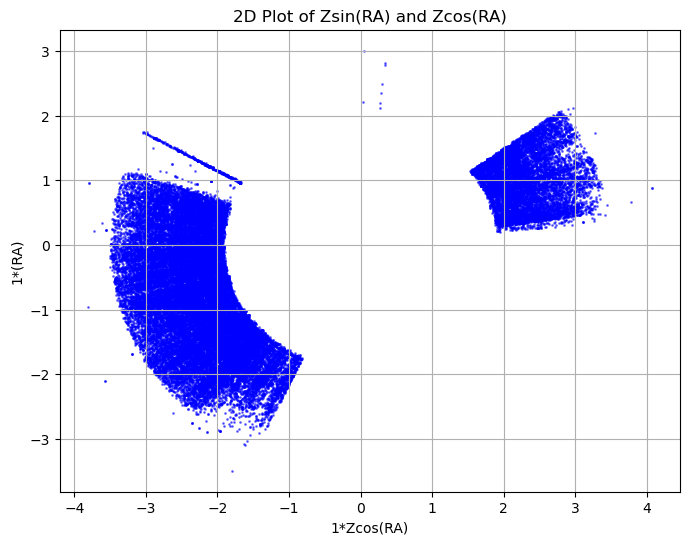

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Zcos(RA)'], df['Zsin(RA)'], s=1, c='b', alpha=0.5)
plt.ylabel(f'{scale}*(RA)')
plt.xlabel(f'{scale}*Zcos(RA)')
plt.title('2D Plot of Zsin(RA) and Zcos(RA)')
plt.grid(True)

plt.savefig('./plots/RA_cartesian.pdf', format='pdf', bbox_inches='tight')

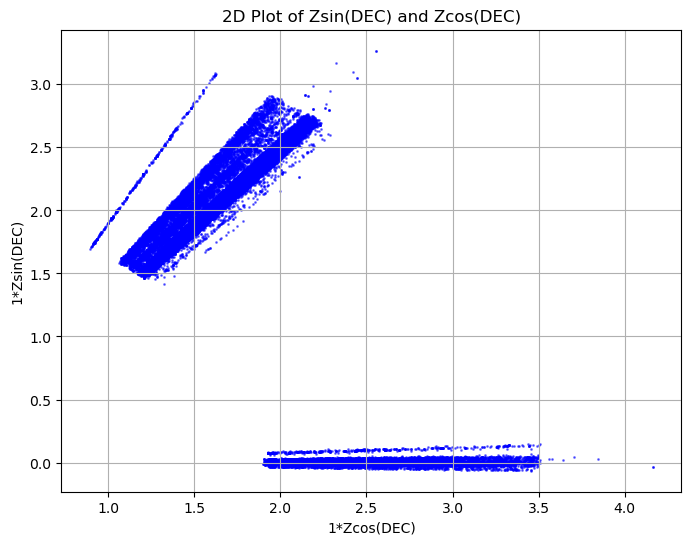

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Zcos(DEC)'], df['Zsin(DEC)'], s=1, c='b', alpha=0.5)
plt.ylabel(f'{scale}*Zsin(DEC)')
plt.xlabel(f'{scale}*Zcos(DEC)')
plt.title('2D Plot of Zsin(DEC) and Zcos(DEC)')
plt.grid(True)
plt.savefig('./plots/DEC_cartesian.pdf', format='pdf', bbox_inches='tight')

In [27]:
lims = (62,62.4)
# Filter the DataFrame based on the 'DEC' column
filtered_df = df[(df['DEC'] >= lims[0]) & (df['DEC'] <= lims[1])]
print(len(filtered_df))

382


In [ ]:
filtered_Zcos_DEC = filtered_df['Zcos(DEC)']
filtered_Zsin_DEC = filtered_df['Zsin(DEC)']
# Access the filtered 'Zcos(DEC)' and 'Zsin(DEC)' columns
filtered_Zcos_RA = filtered_df['Zcos(RA)']
filtered_Zsin_RA = filtered_df['Zsin(RA)']

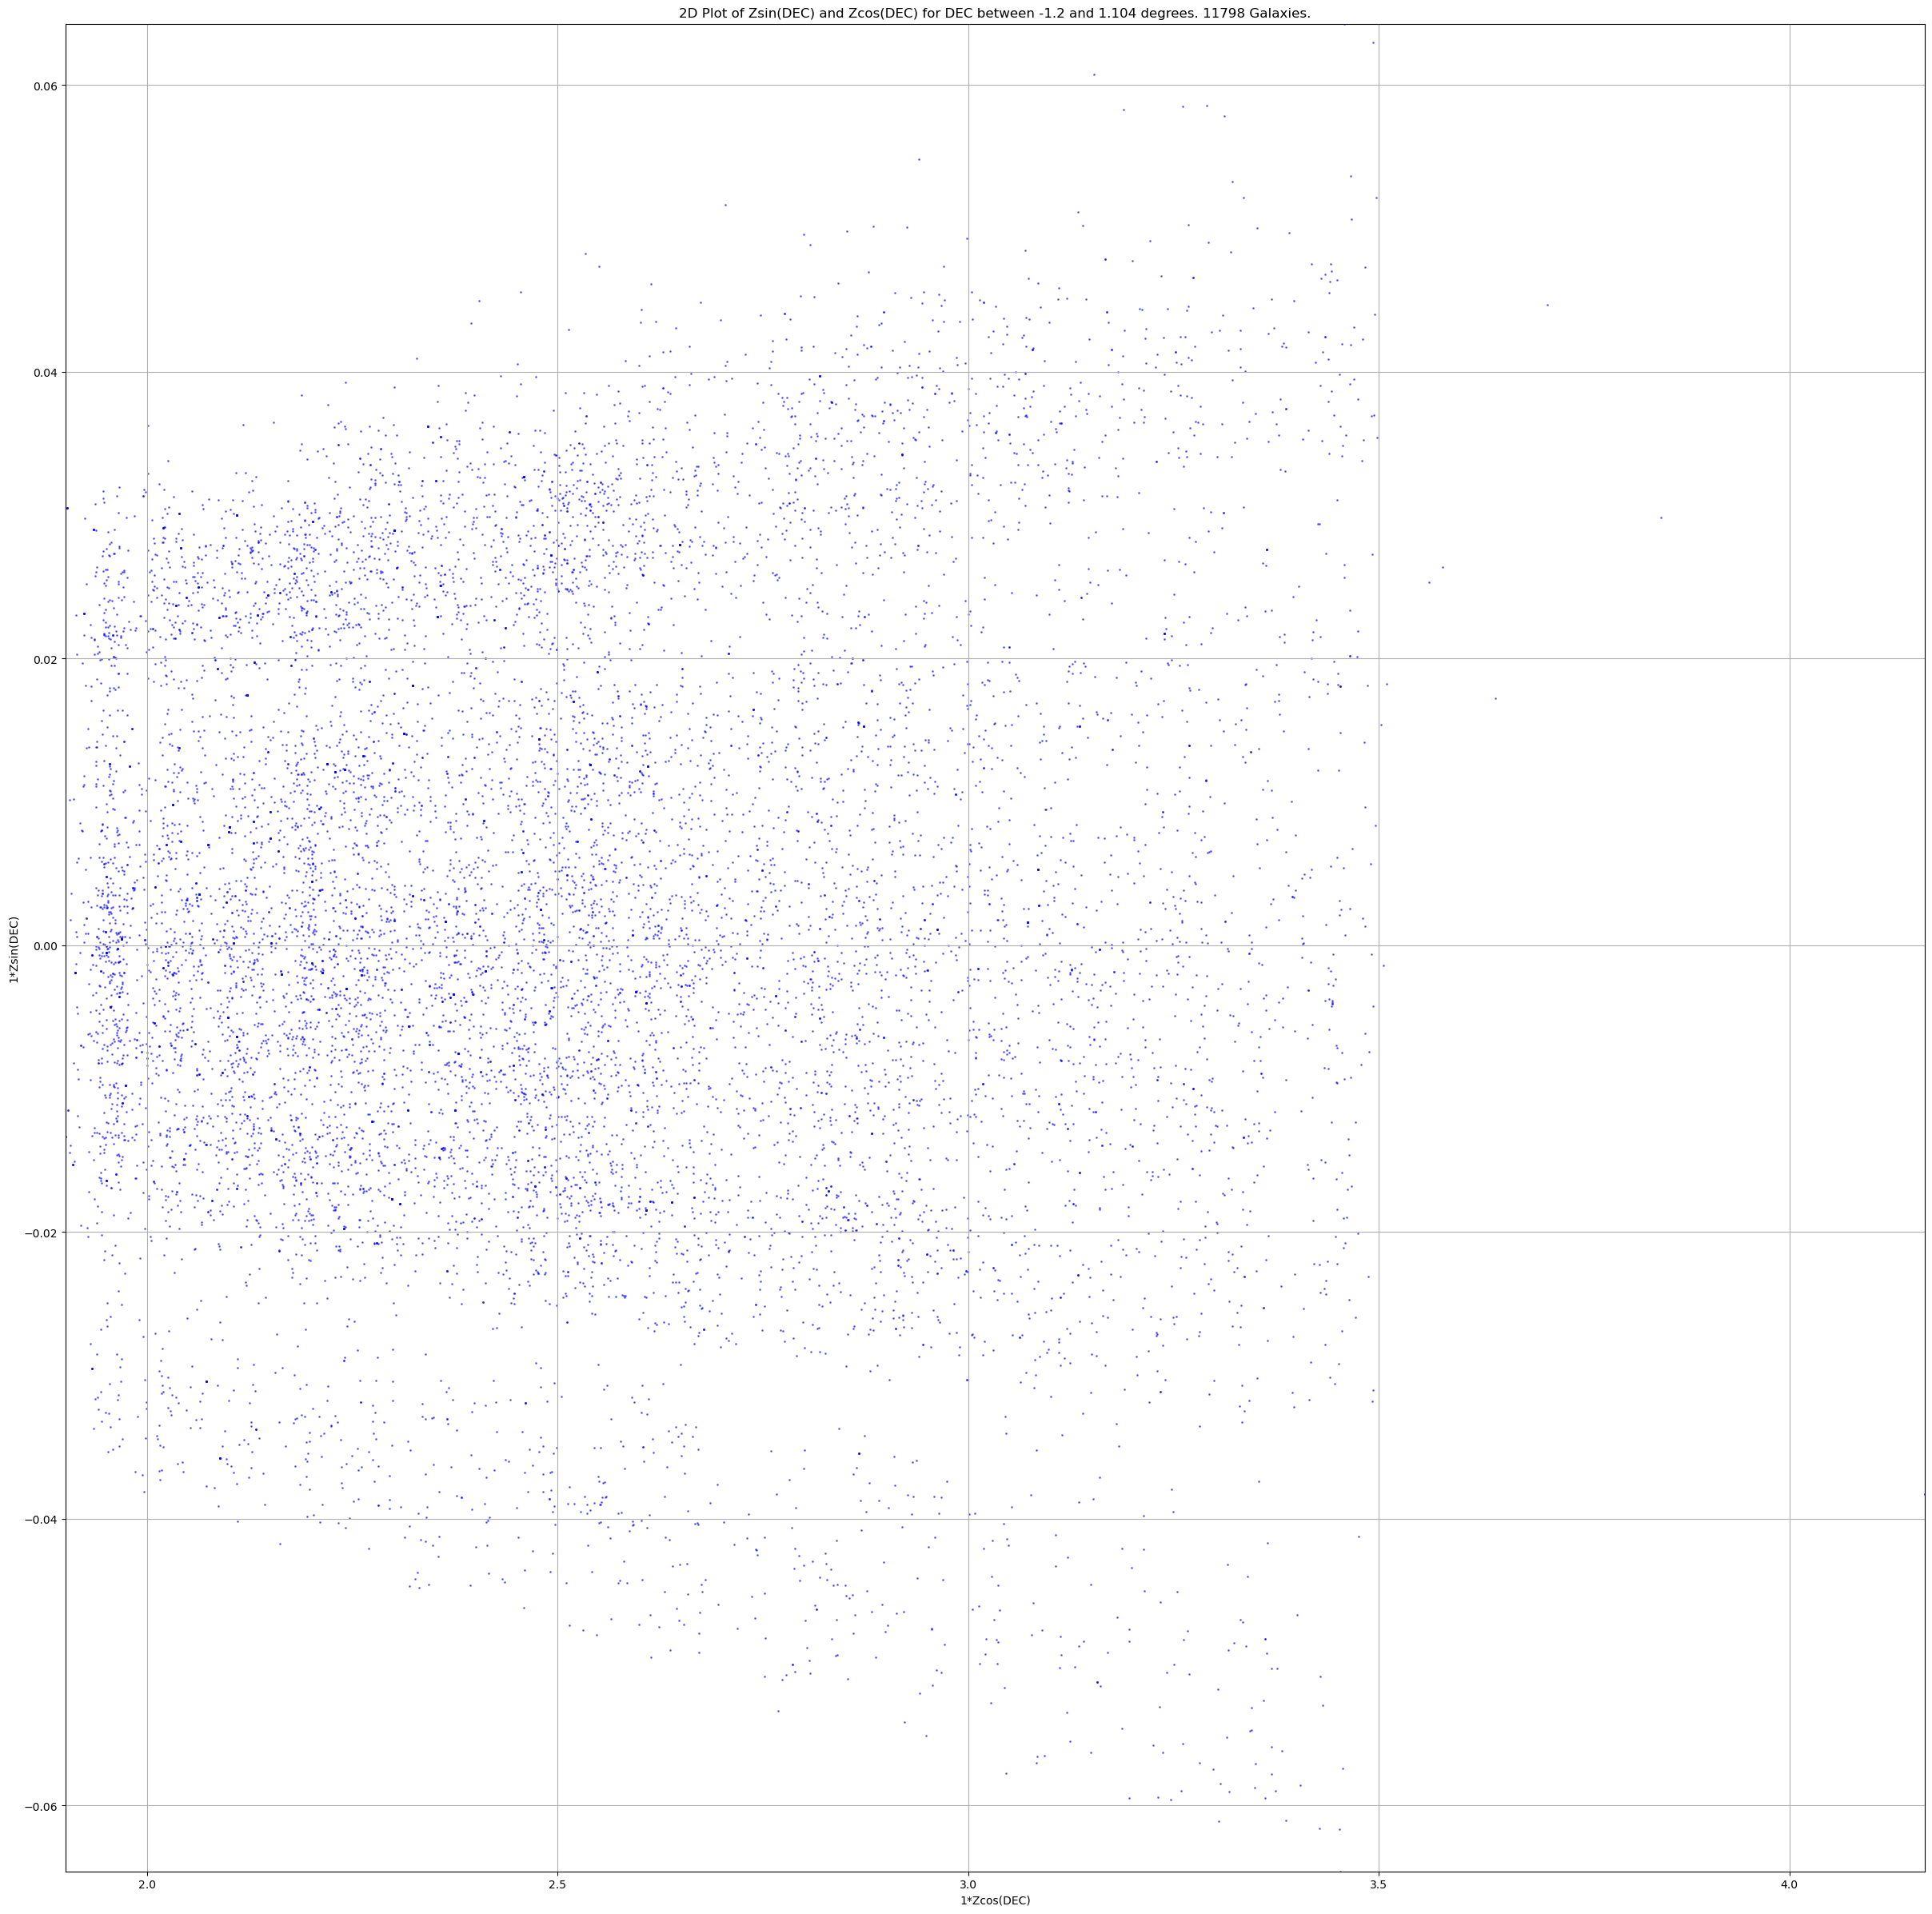

In [17]:
# Plot the filtered data
plt.figure(figsize=(30,30))
plt.scatter(filtered_Zcos_DEC, filtered_Zsin_DEC, s=1, c='b', alpha=0.5)
plt.ylabel(f'{scale}*Zsin(DEC)')
plt.xlabel(f'{scale}*Zcos(DEC)')
plt.title(f'2D Plot of Zsin(DEC) and Zcos(DEC) for DEC between {lims[0]} and {lims[1]} degrees. {len(filtered_df)} Galaxies.')

#plt.xlim(min(filtered_Zcos_DEC), 2.2)
#plt.ylim(min(filtered_Zsin_DEC), 2.8)

plt.xlim(min(filtered_Zcos_DEC), max(filtered_Zcos_DEC))
plt.ylim(min(filtered_Zsin_DEC), max(filtered_Zsin_DEC))
plt.grid(True)
plt.savefig('./plots/DECRANGE1.pdf', format='pdf', bbox_inches='tight')

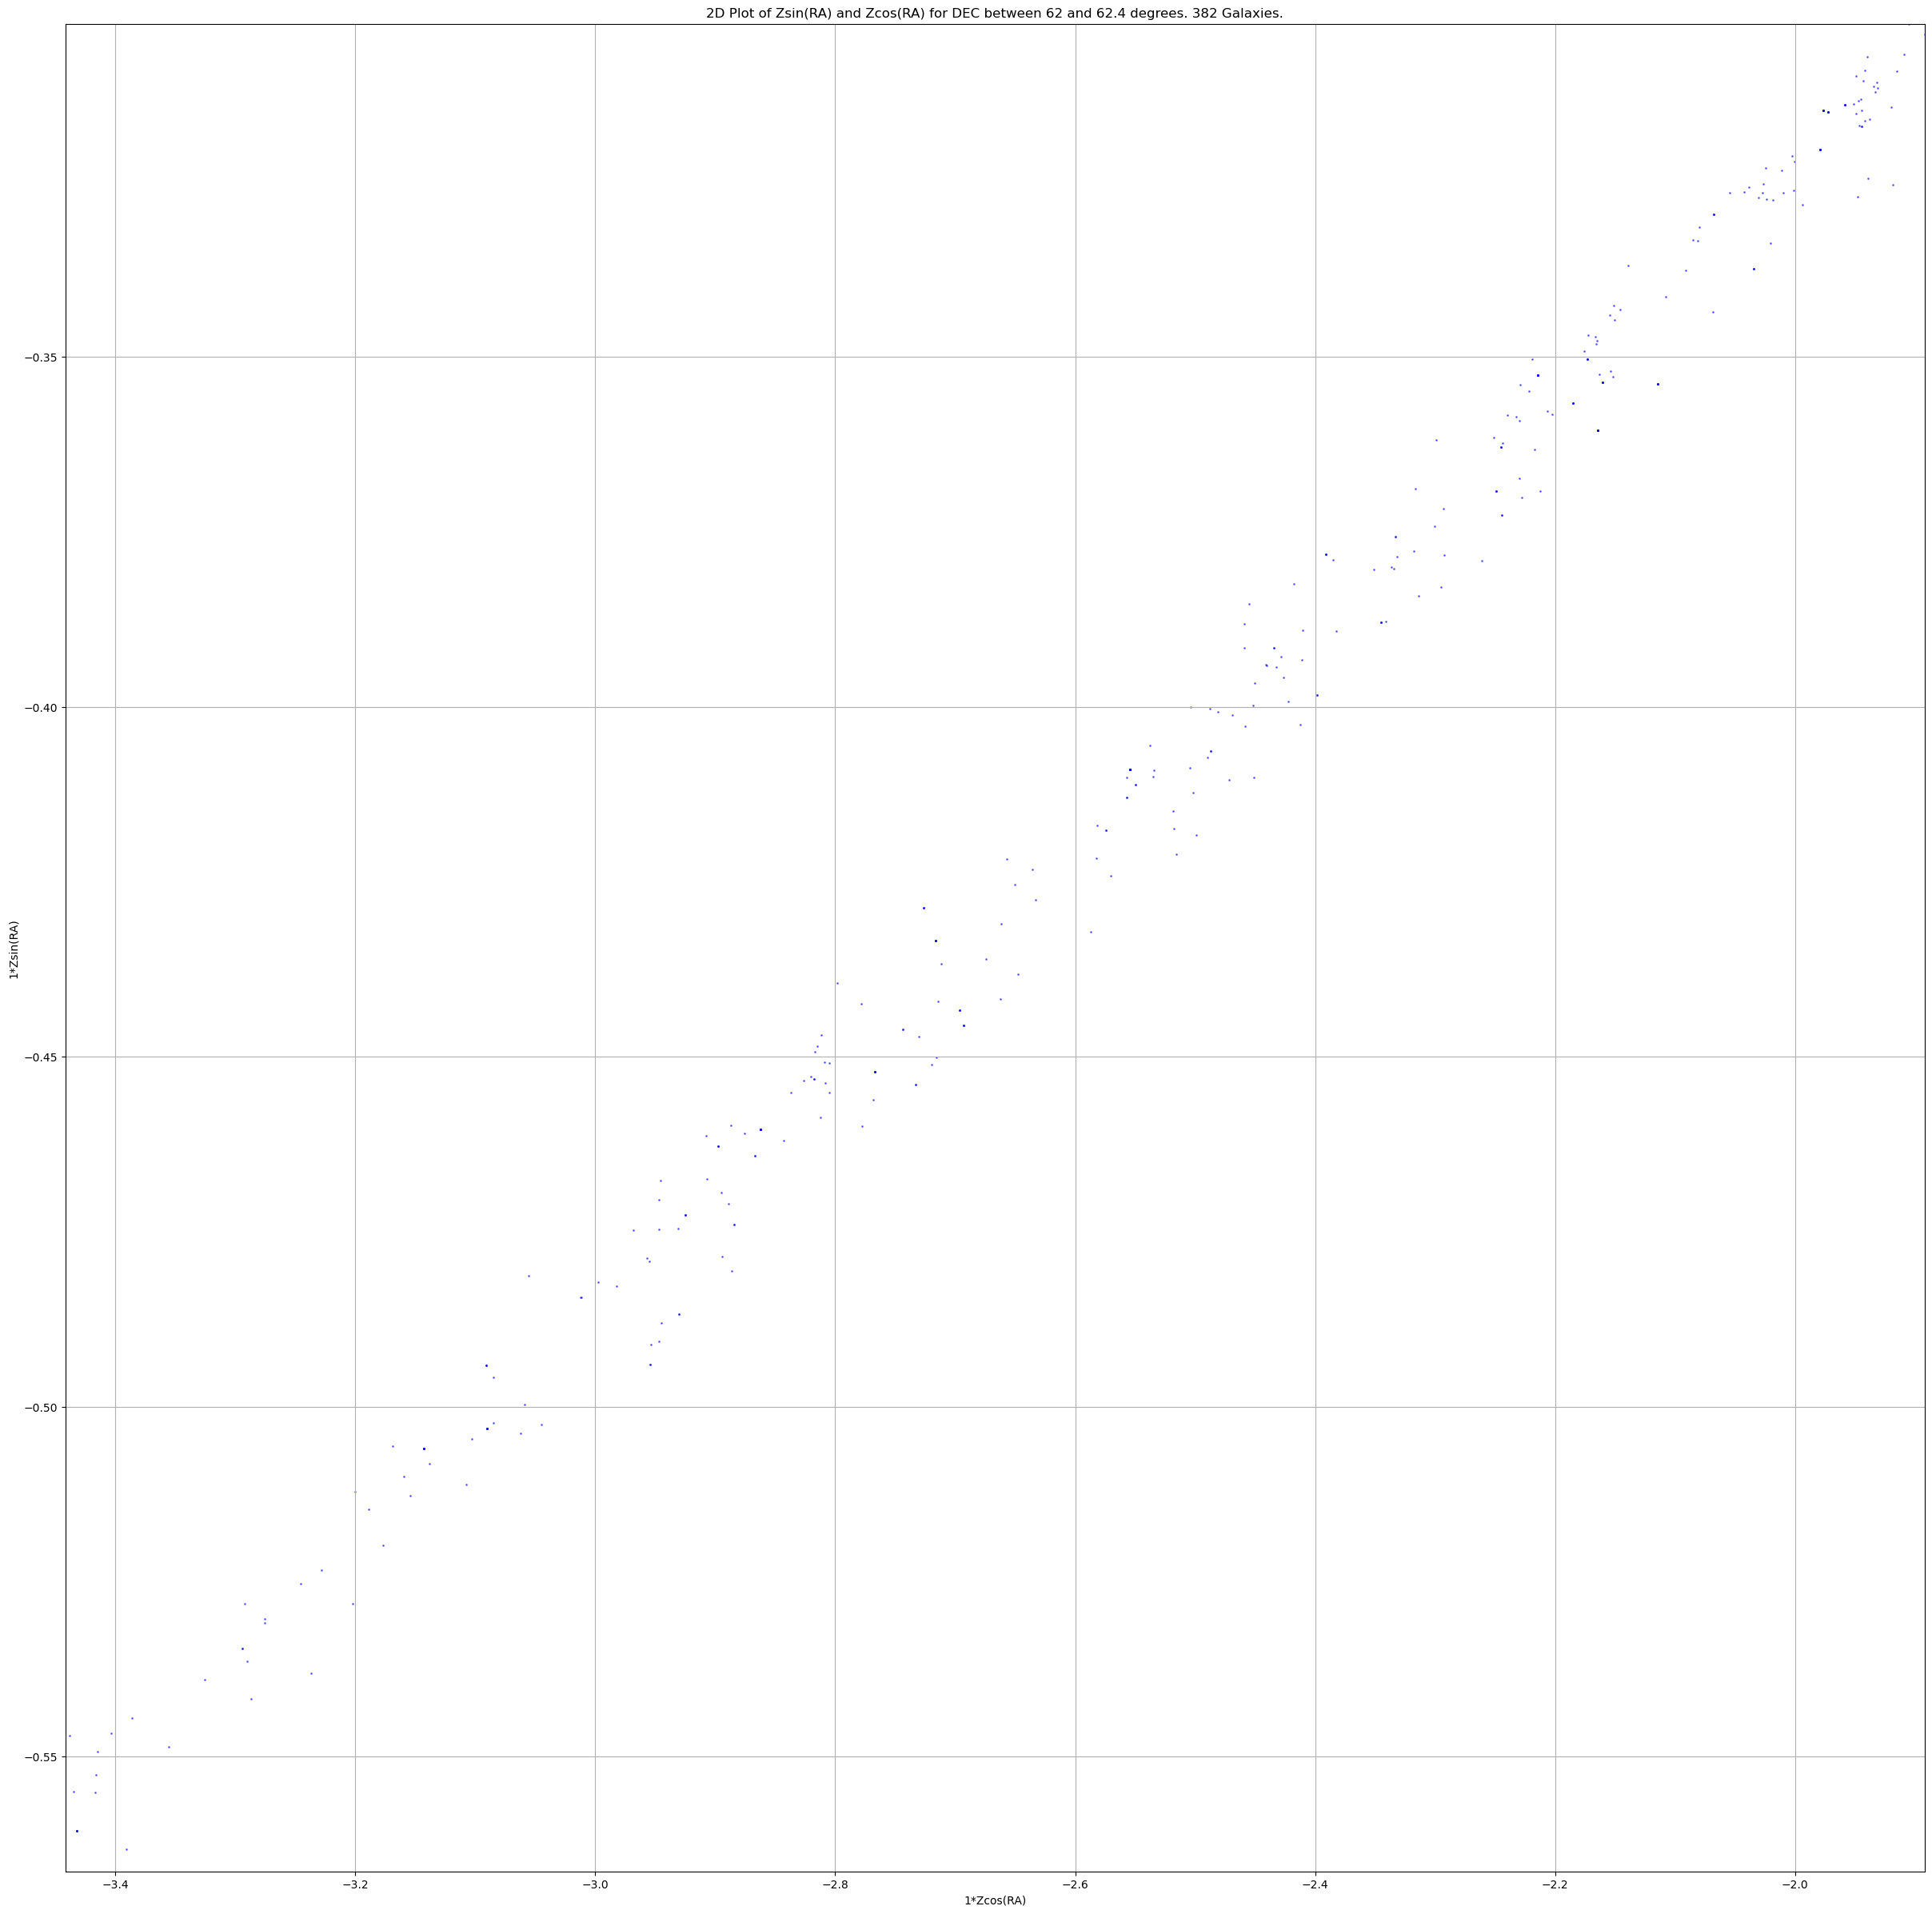

In [102]:


# Plot the filtered data
plt.figure(figsize=(30,30))
plt.scatter(filtered_Zcos_RA, filtered_Zsin_RA, s=1, c='b', alpha=0.5)
plt.ylabel(f'{scale}*Zsin(RA)')
plt.xlabel(f'{scale}*Zcos(RA)')

#plt.xlim(min(filtered_Zcos_RA), -1)
#plt.ylim(min(filtered_Zsin_RA), 0.5)

plt.xlim(min(filtered_Zcos_RA), max(filtered_Zcos_RA))
plt.ylim(min(filtered_Zsin_RA), max(filtered_Zsin_RA))

plt.title(f'2D Plot of Zsin(RA) and Zcos(RA) for DEC between {lims[0]} and {lims[1]} degrees. {len(filtered_df)} Galaxies.')

plt.grid(True)

plt.savefig('./plots/RARANGE1.pdf', format='pdf', bbox_inches='tight')